In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('passengers.csv')
df.rename(columns={'#Passengers': 'passengers_count'}, inplace=True)
df['Month'] = pd.to_datetime(df['Month']) 
df.head()

,Month,passengers_count
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [58]:
df['year'] = df['Month'].dt.year
df['month'] = df['Month'].dt.month
df['day'] = df['Month'].dt.day
df['quarter'] = df['Month'].dt.quarter
df.rename(columns={'Month': 'date'}, inplace=True)

In [59]:
df.head()

,date,passengers_count,year,month,day,quarter
0,1949-01-01,112,1949,1,1,1
1,1949-02-01,118,1949,2,1,1
2,1949-03-01,132,1949,3,1,1
3,1949-04-01,129,1949,4,1,2
4,1949-05-01,121,1949,5,1,2


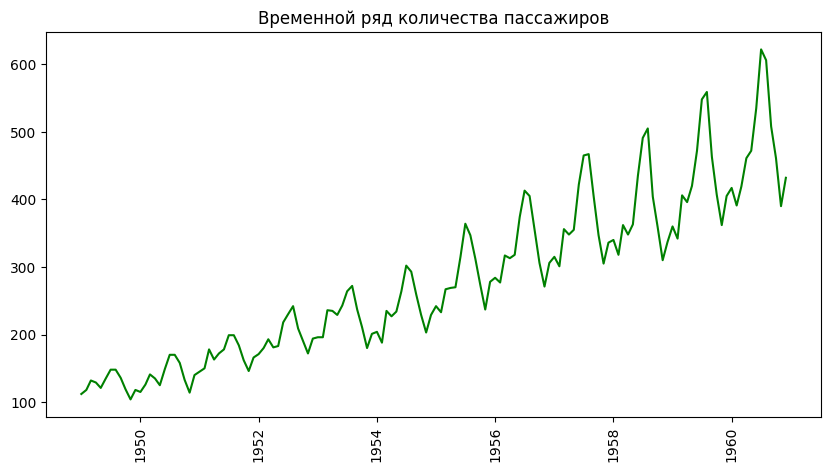

In [60]:
figure, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['date'], df['passengers_count'], color='green', label='passengers_count')
ax.set_title('Временной ряд количества пассажиров')
plt.xticks(rotation=90)
plt.show()

## Task 1

Описание годовой сезонности (график и словесное описание).

In [61]:
month_avg = df.groupby('month')['passengers_count'].mean()

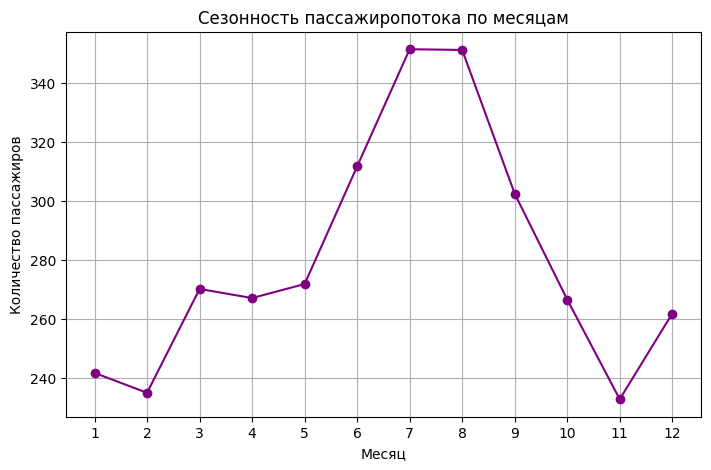

In [62]:
figure, ax = plt.subplots(figsize=(8.2, 5))
ax.plot(month_avg.index, month_avg.values, color='purple', label='passengers_count', marker='o')
ax.set_xlabel('Месяц')
ax.set_xticks(month_avg.index)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сезонность пассажиропотока по месяцам')
plt.grid(True)
plt.show()

In [63]:
quarter_avg = df.groupby('quarter')['passengers_count'].mean()

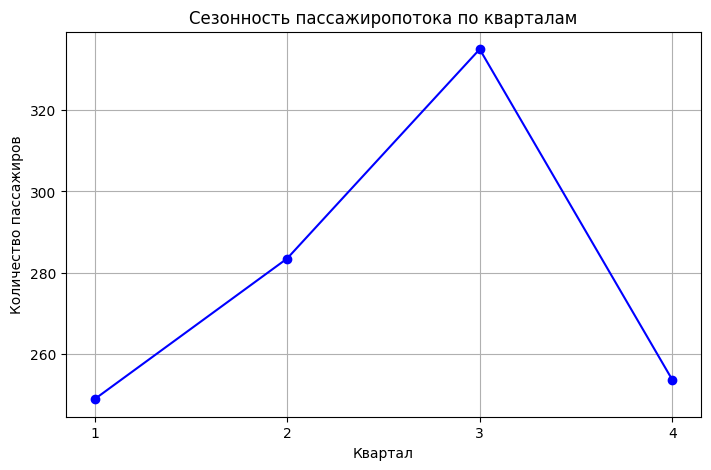

In [64]:
figure, ax = plt.subplots(figsize=(8.2, 5))
ax.plot(quarter_avg.index, quarter_avg.values, color='blue', label='passengers_count', marker='o')
ax.set_xlabel('Квартал')
ax.set_xticks(quarter_avg.index)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сезонность пассажиропотока по кварталам')
plt.grid(True)
plt.show()

**Вывод:** пассажиропоток значительно увеличивается в летние месяцы, начиная с июля и снижается, начиная с сентября. Основной пассажиропоток приходится на третий квартал

## Task 2

Исследовать данные по отдельному месяцу (для того, чтобы не брать в расчёт годовую сезонность). Требуется сделать график и описание: а). рассмотреть январь по разным годам; б). июль.

In [65]:
january_df = df[df['month'] == 1]
july_df = df[df['month'] == 7]

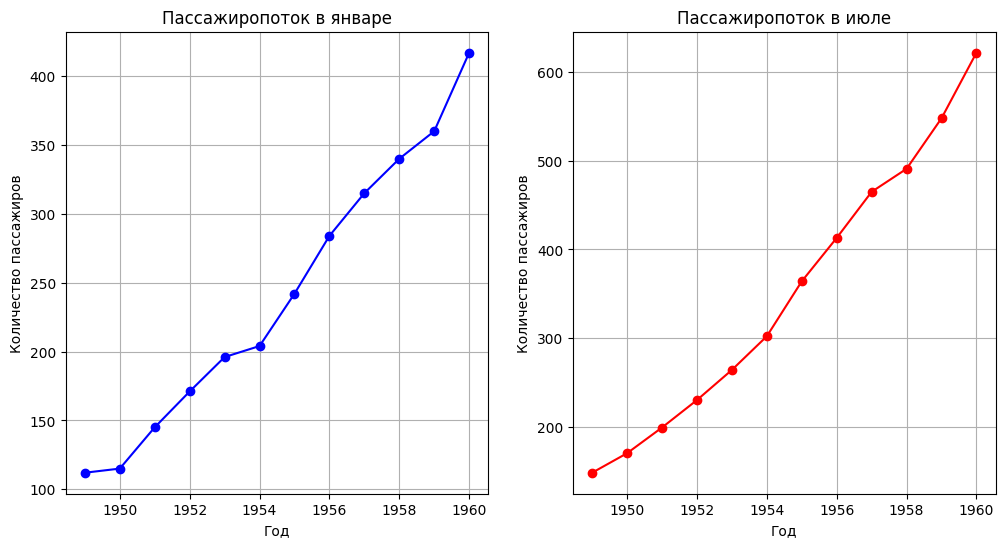

In [66]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].plot(january_df['year'], january_df['passengers_count'], color='blue', label='passengers_count', marker='o')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Пассажиропоток в январе')
axes[0].grid(True)
axes[1].plot(july_df['year'], july_df['passengers_count'], color='red', label='passengers_count', marker='o')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Пассажиропоток в июле')
axes[1].grid(True)
plt.subplots_adjust(hspace=0.3)
plt.show()

**Вывод:** видно, что после 1949 года количество пассажиров росло, как в январе, так и в июле. В июле пассажиропоток рос быстрее

## Task 3

Посчитать среднее и дисперсию по данным внутри каждого года.

In [67]:
stats = df.groupby('year')['passengers_count'].agg(['mean', 'var']).reset_index()
print('Среднее и дисперсия по данным внутри каждого года\n')
stats

Среднее и дисперсия по данным внутри каждого года



,year,mean,var
0,1949,126.666667,188.242424
1,1950,139.666667,363.696970
2,1951,170.166667,339.969697
3,1952,197.000000,527.454545
4,1953,225.000000,810.363636
5,1954,238.916667,1219.719697
6,1955,284.000000,1775.818182
7,1956,328.250000,2290.750000
8,1957,368.416667,3351.356061
9,1958,381.000000,4164.181818


## Task 4

а). Построить абсолютные разности по данным (между соседними месяцами). Сделать график и описание.
б). Построить относительные разности (в % прироста). Сделать график и описание.

In [68]:
df.head()

,date,passengers_count,year,month,day,quarter
0,1949-01-01,112,1949,1,1,1
1,1949-02-01,118,1949,2,1,1
2,1949-03-01,132,1949,3,1,1
3,1949-04-01,129,1949,4,1,2
4,1949-05-01,121,1949,5,1,2


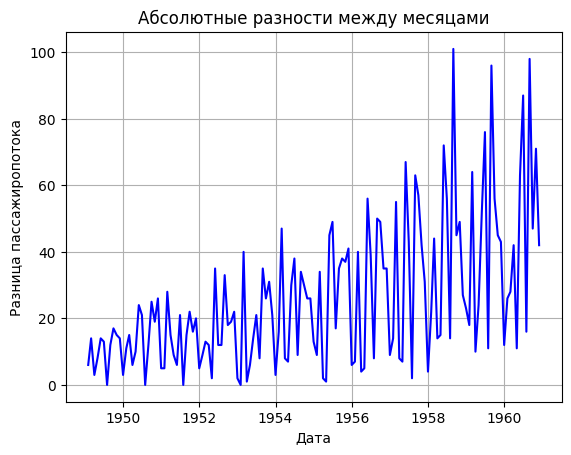

In [69]:
df['abs_diff'] = abs(df['passengers_count'].diff())
plt.plot(df['date'], df['abs_diff'], label='Абсолютные разности', color='blue')
plt.title('Абсолютные разности между месяцами')
plt.xlabel('Дата')
plt.ylabel('Разница пассажиропотока')
plt.grid(True)
plt.show()

**Вывод:** разница пассажиропотока увеличивается каждый год

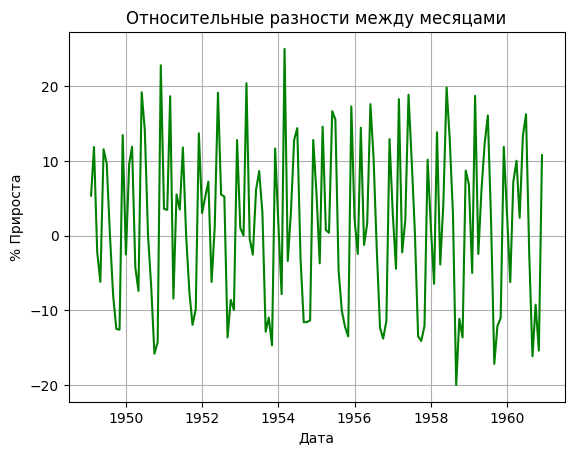

In [70]:
df['relative_diff'] = df['passengers_count'].pct_change() * 100
plt.plot(df['date'], df['relative_diff'], label='Относительные разности (%)', color='green')
plt.title('Относительные разности между месяцами')
plt.xlabel('Дата')
plt.ylabel('% Прироста')
plt.grid(True)
plt.show()

**Вывод:** относительная разность сохраняется с течением времени

## Task 5

а). Понижение частоты дискретизации до года (квартала).
Использовать resample в pandas. Решить, какие аргументы и агрегирующие функции (sum, mean и т.д.) целесообразно в данном случае использовать.

In [71]:
year_avg = df.groupby('year')['passengers_count'].mean()
year_sum = df.groupby('year')['passengers_count'].sum()
year_median = df.groupby('year')['passengers_count'].median()

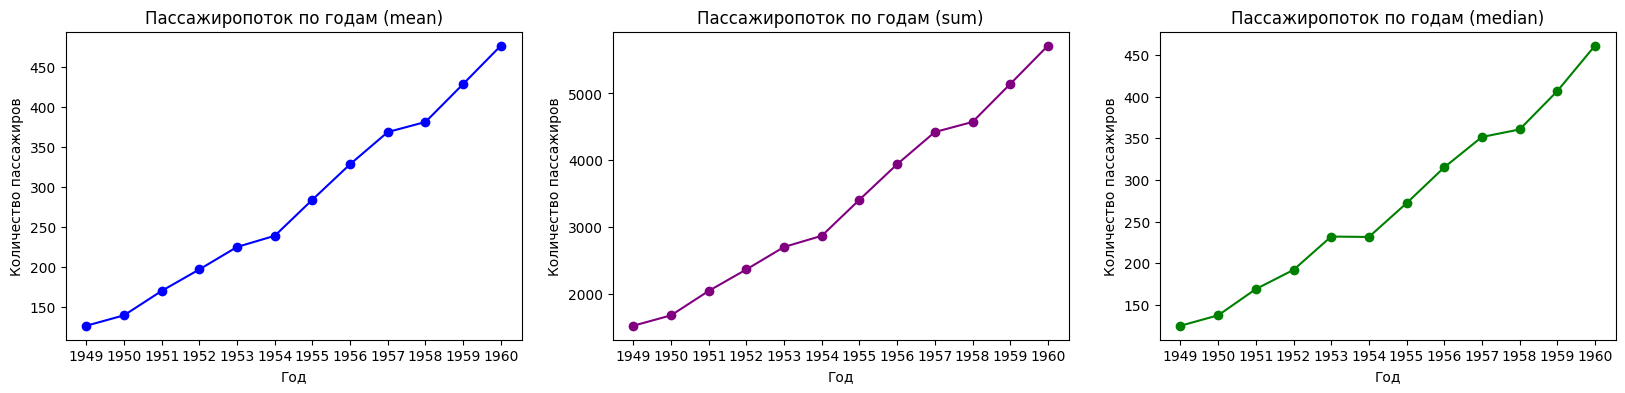

In [72]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
axes[0].plot(year_avg.index, year_avg.values, color='blue', label='passengers_count', marker='o')
axes[0].set_xlabel('Год')
axes[0].set_xticks(year_avg.index)
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Пассажиропоток по годам (mean)')

axes[1].plot(year_sum.index, year_sum.values, color='purple', label='passengers_count', marker='o')
axes[1].set_xlabel('Год')
axes[1].set_xticks(year_sum.index)
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Пассажиропоток по годам (sum)')

axes[2].plot(year_median.index, year_median.values, color='green', label='passengers_count', marker='o')
axes[2].set_xlabel('Год')
axes[2].set_xticks(year_median.index)
axes[2].set_ylabel('Количество пассажиров')
axes[2].set_title('Пассажиропоток по годам (median)')

plt.show()

In [73]:
quarter_avg = df.groupby('quarter')['passengers_count'].mean()
quarter_sum = df.groupby('quarter')['passengers_count'].sum()
quarter_median = df.groupby('quarter')['passengers_count'].median()

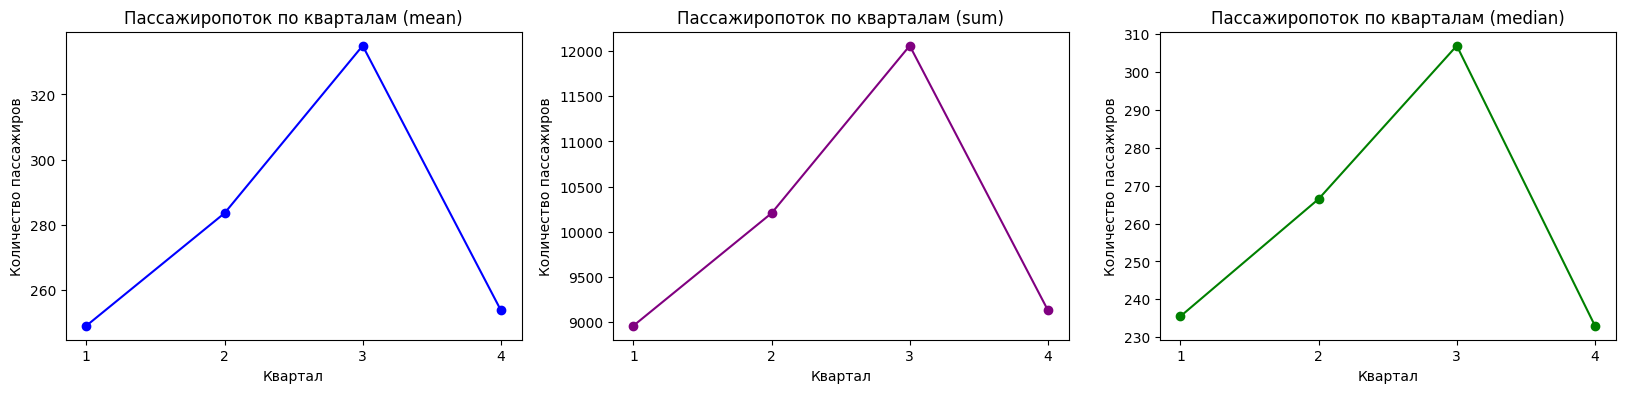

In [74]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
axes[0].plot(quarter_avg.index, quarter_avg.values, color='blue', label='passengers_count', marker='o')
axes[0].set_xlabel('Квартал')
axes[0].set_xticks(quarter_avg.index)
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Пассажиропоток по кварталам (mean)')

axes[1].plot(quarter_sum.index, quarter_sum.values, color='purple', label='passengers_count', marker='o')
axes[1].set_xlabel('Квартал')
axes[1].set_xticks(quarter_sum.index)
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Пассажиропоток по кварталам (sum)')

axes[2].plot(quarter_median.index, quarter_median.values, color='green', label='passengers_count', marker='o')
axes[2].set_xlabel('Квартал')
axes[2].set_xticks(quarter_median.index)
axes[2].set_ylabel('Количество пассажиров')
axes[2].set_title('Пассажиропоток по кварталам (median)')

plt.show()

б). Повышение частоты дискретизации до дня (недели). Рассмотреть целесообразность.

**Ответ:** нецелесообразно, так как в данных отсутствует информация по числам, указаны только 1 числа каждого месяца

## Task 6

In [75]:
df = pd.read_csv('passengers2_refilled_by_rolling_mean.csv')
df.rename(columns={'reference': 'passengers_count'}, inplace=True)
df['Month'] = pd.to_datetime(df['Month']) 
df.head()

,Month,passengers_count,target,missing
0,1949-01-01,112,112.000000,NaN
1,1949-02-01,118,118.000000,NaN
2,1949-03-01,132,132.000000,NaN
3,1949-04-01,129,120.666667,129.0
4,1949-05-01,121,121.000000,NaN


In [76]:
df['year'] = df['Month'].dt.year
df['month'] = df['Month'].dt.month
df['day'] = df['Month'].dt.day
df['quarter'] = df['Month'].dt.quarter
df.rename(columns={'Month': 'date'}, inplace=True)

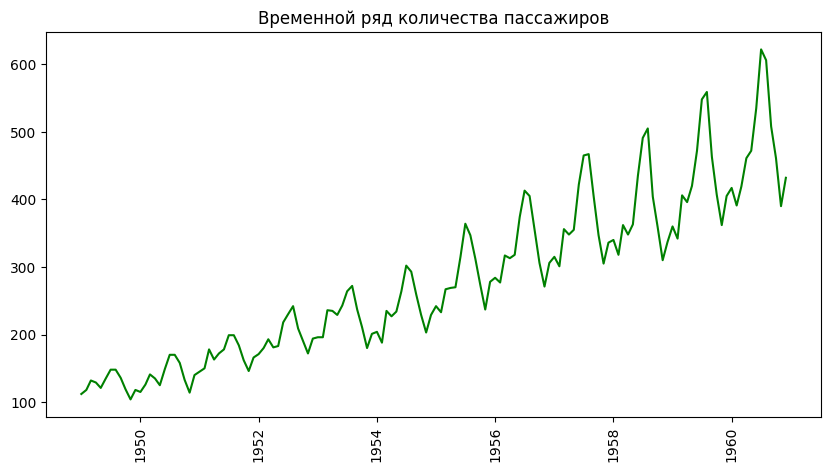

In [77]:
figure, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['date'], df['passengers_count'], color='green', label='passengers_count')
ax.set_title('Временной ряд количества пассажиров')
plt.xticks(rotation=90)
plt.show()

In [78]:
month_avg = df.groupby('month')['passengers_count'].mean()

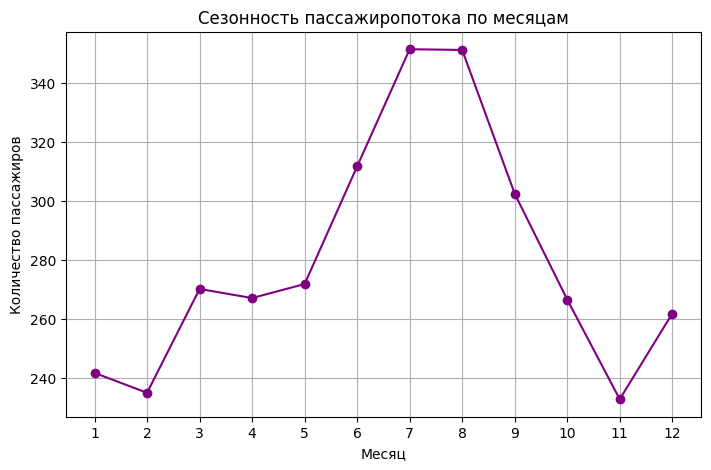

In [79]:
figure, ax = plt.subplots(figsize=(8.2, 5))
ax.plot(month_avg.index, month_avg.values, color='purple', label='passengers_count', marker='o')
ax.set_xlabel('Месяц')
ax.set_xticks(month_avg.index)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сезонность пассажиропотока по месяцам')
plt.grid(True)
plt.show()

In [80]:
quarter_avg = df.groupby('quarter')['passengers_count'].mean()

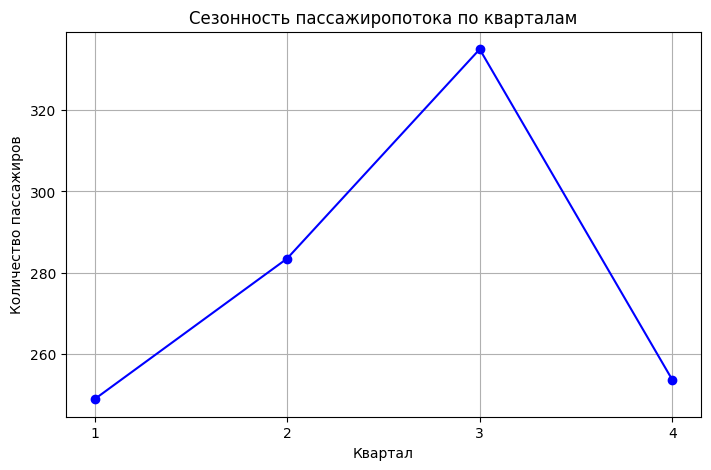

In [81]:
figure, ax = plt.subplots(figsize=(8.2, 5))
ax.plot(quarter_avg.index, quarter_avg.values, color='blue', label='passengers_count', marker='o')
ax.set_xlabel('Квартал')
ax.set_xticks(quarter_avg.index)
ax.set_ylabel('Количество пассажиров')
ax.set_title('Сезонность пассажиропотока по кварталам')
plt.grid(True)
plt.show()

In [82]:
january_df = df[df['month'] == 1]
july_df = df[df['month'] == 7]

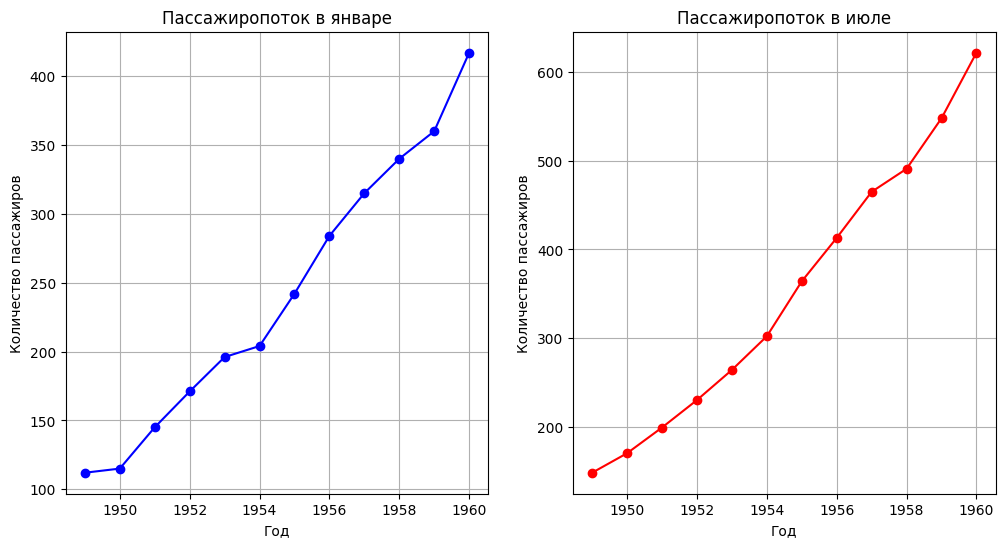

In [83]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].plot(january_df['year'], january_df['passengers_count'], color='blue', label='passengers_count', marker='o')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Пассажиропоток в январе')
axes[0].grid(True)
axes[1].plot(july_df['year'], july_df['passengers_count'], color='red', label='passengers_count', marker='o')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Пассажиропоток в июле')
axes[1].grid(True)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [84]:
stats = df.groupby('year')['passengers_count'].agg(['mean', 'var']).reset_index()
print('Среднее и дисперсия по данным внутри каждого года\n')
stats

Среднее и дисперсия по данным внутри каждого года



,year,mean,var
0,1949,126.666667,188.242424
1,1950,139.666667,363.696970
2,1951,170.166667,339.969697
3,1952,197.000000,527.454545
4,1953,225.000000,810.363636
5,1954,238.916667,1219.719697
6,1955,284.000000,1775.818182
7,1956,328.250000,2290.750000
8,1957,368.416667,3351.356061
9,1958,381.000000,4164.181818


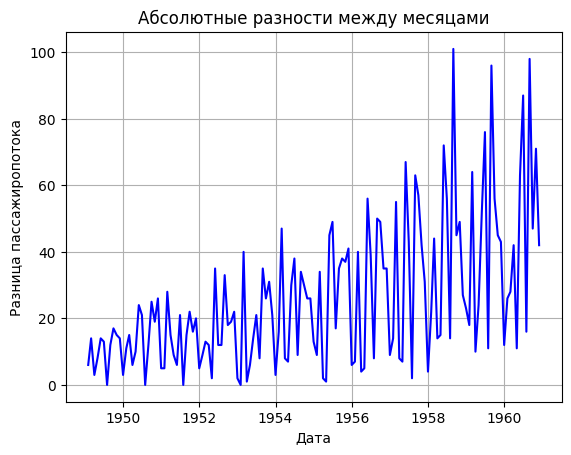

In [85]:
df['abs_diff'] = abs(df['passengers_count'].diff())
plt.plot(df['date'], df['abs_diff'], label='Абсолютные разности', color='blue')
plt.title('Абсолютные разности между месяцами')
plt.xlabel('Дата')
plt.ylabel('Разница пассажиропотока')
plt.grid(True)
plt.show()

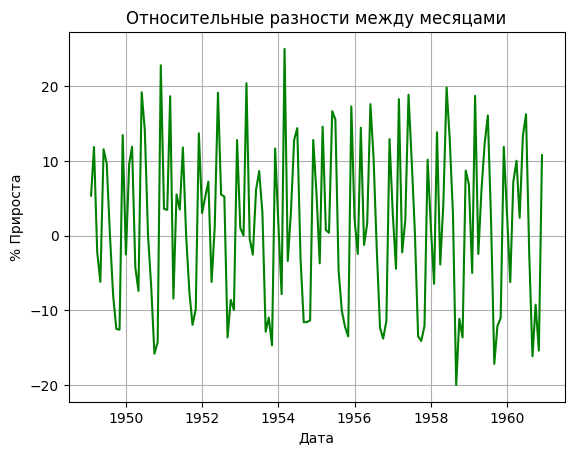

In [86]:
df['relative_diff'] = df['passengers_count'].pct_change() * 100
plt.plot(df['date'], df['relative_diff'], label='Относительные разности (%)', color='green')
plt.title('Относительные разности между месяцами')
plt.xlabel('Дата')
plt.ylabel('% Прироста')
plt.grid(True)
plt.show()

In [87]:
year_avg = df.groupby('year')['passengers_count'].mean()
year_sum = df.groupby('year')['passengers_count'].sum()
year_median = df.groupby('year')['passengers_count'].median()

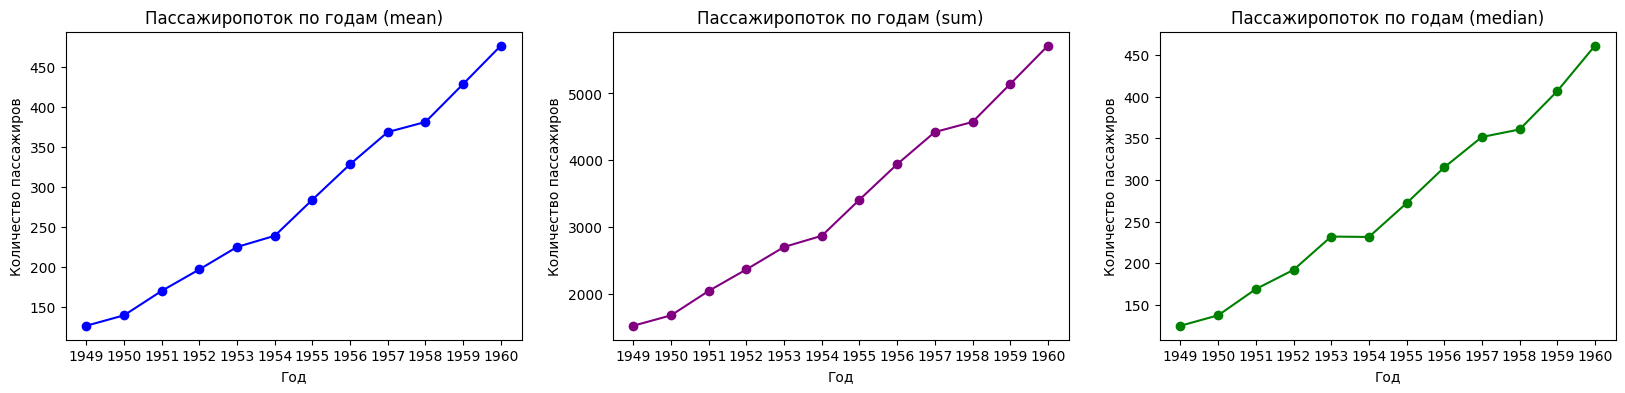

In [88]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
axes[0].plot(year_avg.index, year_avg.values, color='blue', label='passengers_count', marker='o')
axes[0].set_xlabel('Год')
axes[0].set_xticks(year_avg.index)
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Пассажиропоток по годам (mean)')

axes[1].plot(year_sum.index, year_sum.values, color='purple', label='passengers_count', marker='o')
axes[1].set_xlabel('Год')
axes[1].set_xticks(year_sum.index)
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Пассажиропоток по годам (sum)')

axes[2].plot(year_median.index, year_median.values, color='green', label='passengers_count', marker='o')
axes[2].set_xlabel('Год')
axes[2].set_xticks(year_median.index)
axes[2].set_ylabel('Количество пассажиров')
axes[2].set_title('Пассажиропоток по годам (median)')

plt.show()

In [89]:
quarter_avg = df.groupby('quarter')['passengers_count'].mean()
quarter_sum = df.groupby('quarter')['passengers_count'].sum()
quarter_median = df.groupby('quarter')['passengers_count'].median()

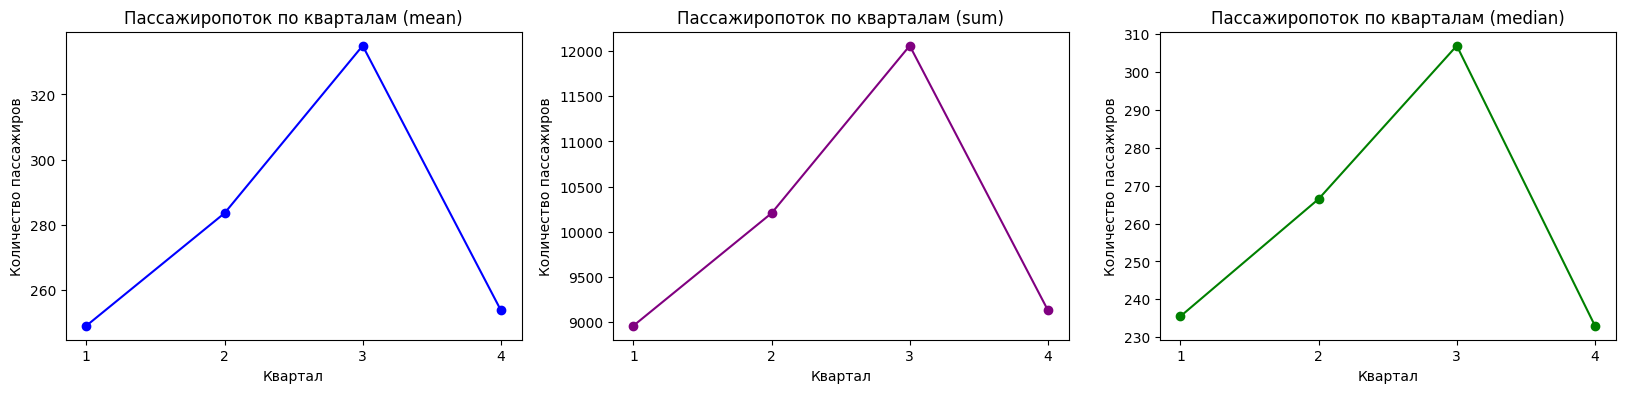

In [90]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
axes[0].plot(quarter_avg.index, quarter_avg.values, color='blue', label='passengers_count', marker='o')
axes[0].set_xlabel('Квартал')
axes[0].set_xticks(quarter_avg.index)
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Пассажиропоток по кварталам (mean)')

axes[1].plot(quarter_sum.index, quarter_sum.values, color='purple', label='passengers_count', marker='o')
axes[1].set_xlabel('Квартал')
axes[1].set_xticks(quarter_sum.index)
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Пассажиропоток по кварталам (sum)')

axes[2].plot(quarter_median.index, quarter_median.values, color='green', label='passengers_count', marker='o')
axes[2].set_xlabel('Квартал')
axes[2].set_xticks(quarter_median.index)
axes[2].set_ylabel('Количество пассажиров')
axes[2].set_title('Пассажиропоток по кварталам (median)')

plt.show()